# 주제 : 서울시 공공 자전거 수요 분석

- 자료 출처
    - https://data.seoul.go.kr/
    - http://archive.ics.uci.edu
    - https://archive.ics.uci.edu/ml/machine-learning-databases/00560/

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [32]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default") # 경고문 다시 뜨도록

## 1. Data Definition

In [119]:
bike = pd.read_csv("data/SeoulBikeData.csv")
bike.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [120]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

## 2. Quiz

### (1) 시간대별로 평균 몇 대가 대여되었을까?

In [121]:
bike.groupby(["Hour", "Rented Bike Count"]).mean()

Temperature(C)  Humidity(%)  Wind speed (m/s)  \
Hour Rented Bike Count                                                  
0    0                       14.838462    70.230769          1.346154   
     22                       7.600000    88.000000          2.500000   
     26                      21.400000    97.000000          0.600000   
     29                      20.400000    97.000000          0.300000   
     32                      15.800000    97.000000          2.400000   
...                                ...          ...               ...   
23   1646                    21.900000    56.000000          0.700000   
     1648                    22.900000    34.000000          1.100000   
     1657                    19.500000    72.000000          0.600000   
     1672                    20.000000    79.000000          1.400000   
     1732                    22.300000    59.000000          1.100000   

                        Visibility (10m)  Dew point temperature(C)  \
Hour Rented Bike Count                                               
0    0                       1683.615385                  9.184615   
     22                      1974.000000                  5.700000   
     26                       680.000000                 20.800000   
     29                       183.000000                 19.900000   
     32                       181.000000                 15.300000   
...                                  ...                       ...   
23   1646                    1898.000000                 12.700000   
     1648                    1810.000000                  6.100000   
     1657                    1989.000000                 14.300000   
     1672                     510.000000                 16.200000   
     1732                    1892.000000                 13.800000   

                        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
Hour Rented Bike Count                                                        
0    0                                      0.0      1.461538            0.0  
     22                                     0.0      9.000000            0.0  
     26                                     0.0      2.500000            0.0  
     29                                     0.0      5.500000            0.0  
     32                                     0.0      3.500000            0.0  
...                                         ...           ...            ...  
23   1646                                   0.0      0.000000            0.0  
     1648                                   0.0      0.000000            0.0  
     1657                                   0.0      0.000000            0.0  
     1672                                   0.0      0.000000            0.0  
     1732                                   0.0      0.000000            0.0  

[7219 rows x 8 columns]

In [122]:
bike.groupby("Hour").mean()["Rented Bike Count"] # Series형식

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

In [123]:
bike.groupby("Hour").mean()[["Rented Bike Count"]].round(2) # DataFrame형식

,Rented Bike Count
Hour,
0,541.46
1,426.18
2,301.63
3,203.33
4,132.59
5,139.08
6,287.56
7,606.01
8,1015.70


In [124]:
bike2=bike.set_index("Hour")
bike2

hour_avg_bike=bike2.groupby(["Hour"])[["Rented Bike Count"]].mean()

### (2) 위의 결과를 시각화

<AxesSubplot:xlabel='Hour'>

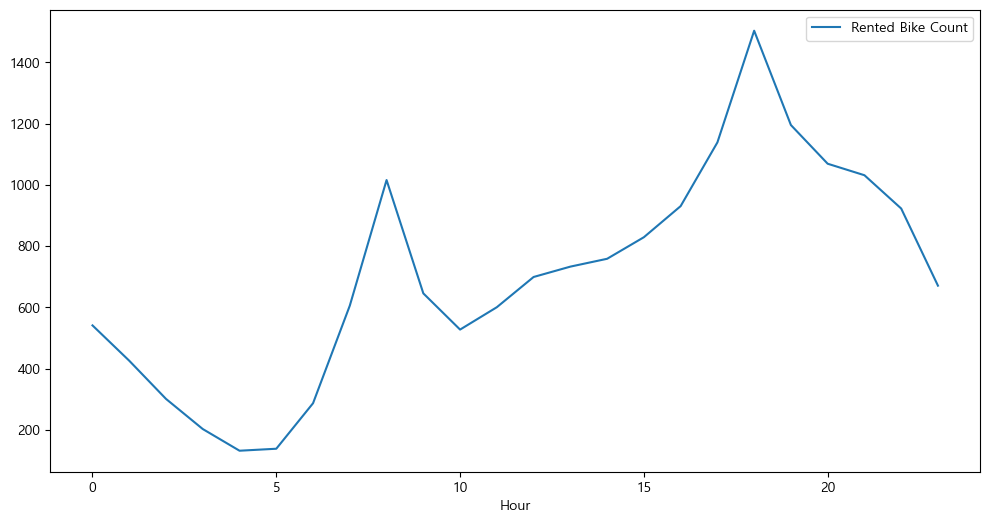

In [125]:
hour_avg_bike.plot(figsize=(12,6))

Text(16, 150, '퇴근')

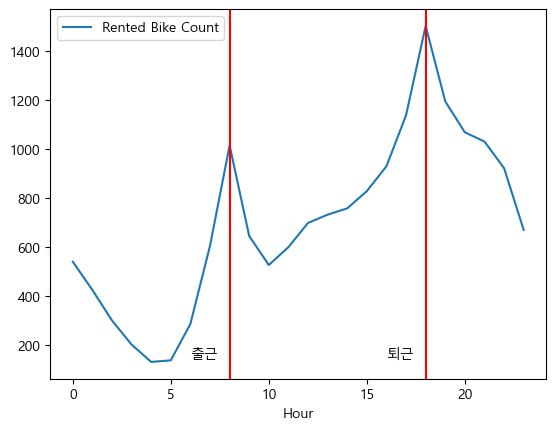

In [126]:
bike.groupby("Hour").mean()[["Rented Bike Count"]].plot()

plt.axvline(x=8, color="r") # ax(축)을 v(vertical)의 선을 x=8인 위치에 하나 그리겠다.
plt.axvline(x=18, color="r")
plt.text(6, 150, "출근") # x좌표,y좌표,"입력할 말"
plt.text(16, 150, "퇴근")

### (3) 요일별로 평균 몇 대가 대여되었을까?

- 2016년 1월 1일은 금요일이다.
    - 현재 날짜에서 2016년 1월 1일을 빼준다.
    - 그 날짜의 차이를 7로 나눠준다.
    - 나머지가 0이면 금요일

#### 1) 첫번째 방법

- 보통 년/월/일의 순서로 데이터가 정리되지만 이 데이터의 경우 반대이다
- 그런 이유로 순서를 년/월/일의 위치를 지정해주고 변경한 2번째 방법과 숫자값의 차이가 1 발생한다.
- 하지만 우리가 필요한 것은 각 날짜에 맞는 요일이기에 숫자로 바뀐 값을 해당 날짜의 정확한 요일로 치환해주므로써 해결하였다.

In [127]:
bike["Date"] # 문자열형식임 #object 문자열 형식임

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object

In [128]:
pd.to_datetime(bike["Date"]) # datetime64[ns]으로 바뀜

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [129]:
pd.to_datetime(bike["Date"]).dt # datetime 형식으로 바꿈

In [130]:
pd.to_datetime(bike["Date"]).dt.weekday # weekday = 각 요일에 맞는 숫자를 뽑아줌

0       3
1       3
2       3
3       3
4       3
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: Date, Length: 8760, dtype: int64

In [131]:
from datetime import datetime

date_string = "01/12/2017"
date_format = "%d/%m/%Y"

# Convert the date string to a datetime object
date_object = datetime.strptime(date_string, date_format)

# Get the day of the week as a string
day_of_week = date_object.strftime("%A")

# Print the day of the week
print(day_of_week)

Friday


In [132]:
bike["Weekday1"] = pd.to_datetime(bike["Date"]).dt.weekday # Weekday1이라는 컬럼을 하나 추가하겠다.
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3


In [133]:
print(bike["Weekday1"].unique())

[3 6 2 4 0 5 1]


In [134]:
# 01/12/2017 = 금요일이므로 3 = 금요일이 되도록 순서 조절
bike_map = {0:"화요일", 1:"수요일", 2:"목요일", 3:"금요일", 4:"토요일", 5:"일요일", 6:"월요일"}
bike["num_weekday"] = bike["Weekday1"].map(bike_map)

In [135]:
bike["num_weekday"]

0       금요일
1       금요일
2       금요일
3       금요일
4       금요일
       ... 
8755    토요일
8756    토요일
8757    토요일
8758    토요일
8759    토요일
Name: num_weekday, Length: 8760, dtype: object

#### 2) 두번째 방법

In [136]:
pd.to_datetime(bike["Date"], format="%d/%m/%Y") # 자료가 일 / 월 / 년으로 되어있기에 이런 순서라고 지정해줌,

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [137]:
bike["Weekday2"] = pd.to_datetime(bike["Date"], format="%d/%m/%Y").dt.weekday # weekday1과 weekday2가 다르다?????
bike.head() # 일/월/년의 자료였기에 오류가 발생한 것을 무시하고 넘어갔던 Weekday1이지만 실제로 오류가 있었다.
# 그래서 format으로 일월년 순서를 잡아준 Weekday2와 차이가 발생했다.

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday1,num_weekday,Weekday2
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,4
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,4
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,4
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,4
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,4


In [138]:
# 두번째 방법으로 바꾼 숫자값에 의하면 01/12/2017 = 4이다.
# 01/12/2017 = 금요일 이므로 그 순서에 맞게 map과 리스트를 준비하여 바꿔준다.
bike_map2 = {0:"월요일", 1:"화요일", 2:"수요일", 3:"금요일", 4:"금요일", 5:"토요일", 6:"일요일"}
bike["Weekday2"] = bike["Weekday2"].map(bike_map2)

In [139]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday1,num_weekday,Weekday2
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일


#### 3) 세번째 방법

In [140]:
pd.to_datetime(bike["Date"], format="%d/%m/%Y") - pd.to_datetime("2016-01-01") # pd.to_datetime으로 둘 다 날짜형으로 바꾼 후 빼준다

0       700 days
1       700 days
2       700 days
3       700 days
4       700 days
          ...   
8755   1064 days
8756   1064 days
8757   1064 days
8758   1064 days
8759   1064 days
Name: Date, Length: 8760, dtype: timedelta64[ns]

In [141]:
(pd.to_datetime(bike["Date"], format="%d/%m/%Y") - pd.to_datetime("2016-01-01")).dt.days

0        700
1        700
2        700
3        700
4        700
        ... 
8755    1064
8756    1064
8757    1064
8758    1064
8759    1064
Name: Date, Length: 8760, dtype: int64

In [142]:
((pd.to_datetime(bike["Date"], format="%d/%m/%Y") - pd.to_datetime("2016-01-01")).dt.days) % 7
(((pd.to_datetime(bike["Date"], format="%d/%m/%Y") - pd.to_datetime("2016-01-01")).dt.days) % 7).map({0:"금요일",
                                                                                                    1:"토요일",
                                                                                                    2:"일요일",
                                                                                                    3:"월요일",
                                                                                                    4:"화요일",
                                                                                                    5:"수요일",
                                                                                                    6:"목요일"})
bike.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday1,num_weekday,Weekday2
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일


In [143]:
date_diff = pd.to_datetime(bike["Date"], format="%d/%m/%Y") - pd.to_datetime("2016-01-01")


date_diff.astype(str).str.split(" ") # 원래 '700 days'로 묶여있음. 그래서 문자열로 바꾸고 공백으로 분리함
#분리했더니 ['700', 'days']로 리스트로 묶였음. 이럴 땐 expand=True 사용.
date_diff.astype(str).str.split(" ", expand=True) # 각자 다른 컬럼으로 분리가 되버림
date_diff.astype(str).str.split(" ", expand=True)[0] # 0번과 1번의 컬럼 중에서 1번만 가져오겠다.
date_diff.astype(str).str.split(" ", expand=True)[0].astype(int) # 1번에서 가져온 값들을 다시 숫자형으로 바꾸겠다.
new = date_diff.astype(str).str.split(" ", expand=True)[0].astype(int)

In [144]:
def func_week(x):
    if x % 7 ==0:
        return "금요일"
    elif x % 7 ==1:
        return "토요일"
    elif x % 7 ==2:
        return "일요일"
    elif x % 7 ==3:
        return "월요일"
    elif x % 7 ==4:
        return "화요일"
    elif x % 7 ==5:
        return "수요일"
    elif x % 7 ==6:
        return "목요일" #나중에 람다함수로 바꿔보자. #map함수로도 사용해보자

bike["Weekday3"] = new.apply(func_week) #이거 원리 복습필요
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday1,num_weekday,Weekday2,Weekday3
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일


## (4) 4번째 방법

In [146]:
import pandas as pd

bike["Date"] = pd.to_datetime(bike["Date"], dayfirst=True)  # Convert "Date" column to datetime format

bike["DayOfWeek"] = bike["Date"].dt.day_name()  # Create a new column "DayOfWeek" with the day of the week

bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday1,num_weekday,Weekday2,Weekday3,DayOfWeek
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,금요일,금요일,Friday


In [83]:
#### 요일별로 대여회수 조회
bike.groupby("Weekday3").mean()[["Rented Bike Count"]]

,Rented Bike Count
Weekday3,
금요일,747.117925
목요일,690.704327
수요일,740.349359
월요일,730.563301
일요일,625.155449
토요일,709.528846
화요일,687.977564


### (4) 위의 결과를 시각화

<AxesSubplot:xlabel='Weekday1', ylabel='Rented Bike Count'>

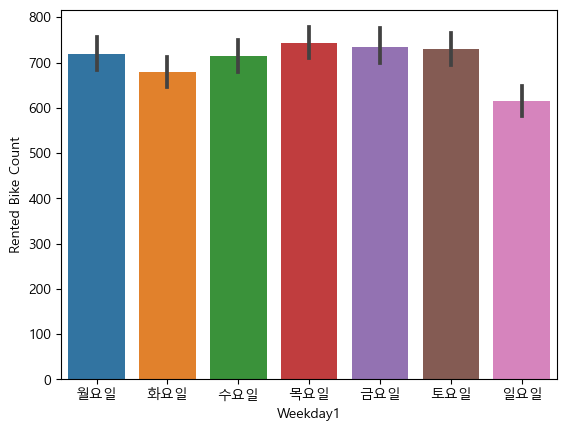

In [66]:
sns.barplot(x="Weekday1", y="Rented Bike Count", data=bike)
sns.barplot(x="Weekday1", y="Rented Bike Count", data=bike,
            order=["월요일", "화요일","수요일","목요일","금요일","토요일","일요일"])

###  (5) 요일별, 시간대별로 시각화

(<Figure size 640x480 with 8 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
       dtype=object))

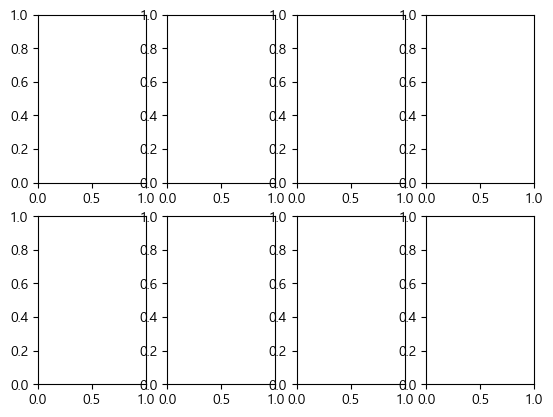

In [71]:
plt.subplots(2,4) # 2행 4열로 그래프를 만들겠다

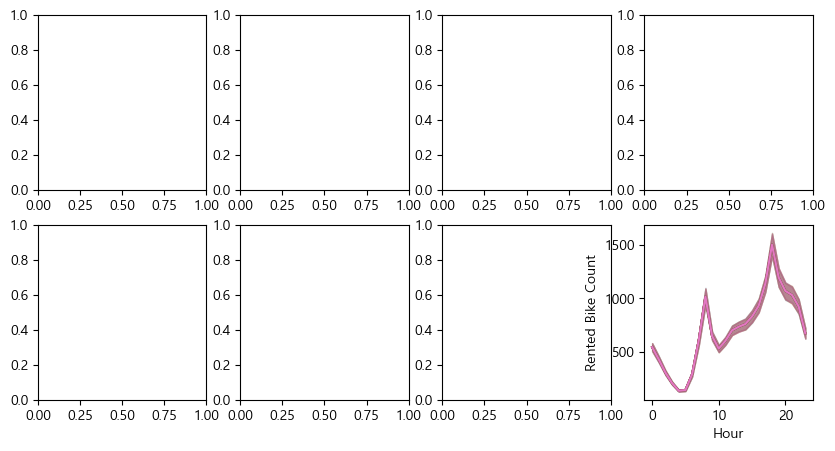

In [72]:
_, ax = plt.subplots(2,4, figsize = (10, 5)) # 원래 fig, ax지만 8개의 그래프가 있으므로 _로 처리.



for i in range(7):
    sns.lineplot(x="Hour", y="Rented Bike Count", data=bike) # 마지막 칸에 7개의 그래프가 그려졌음.

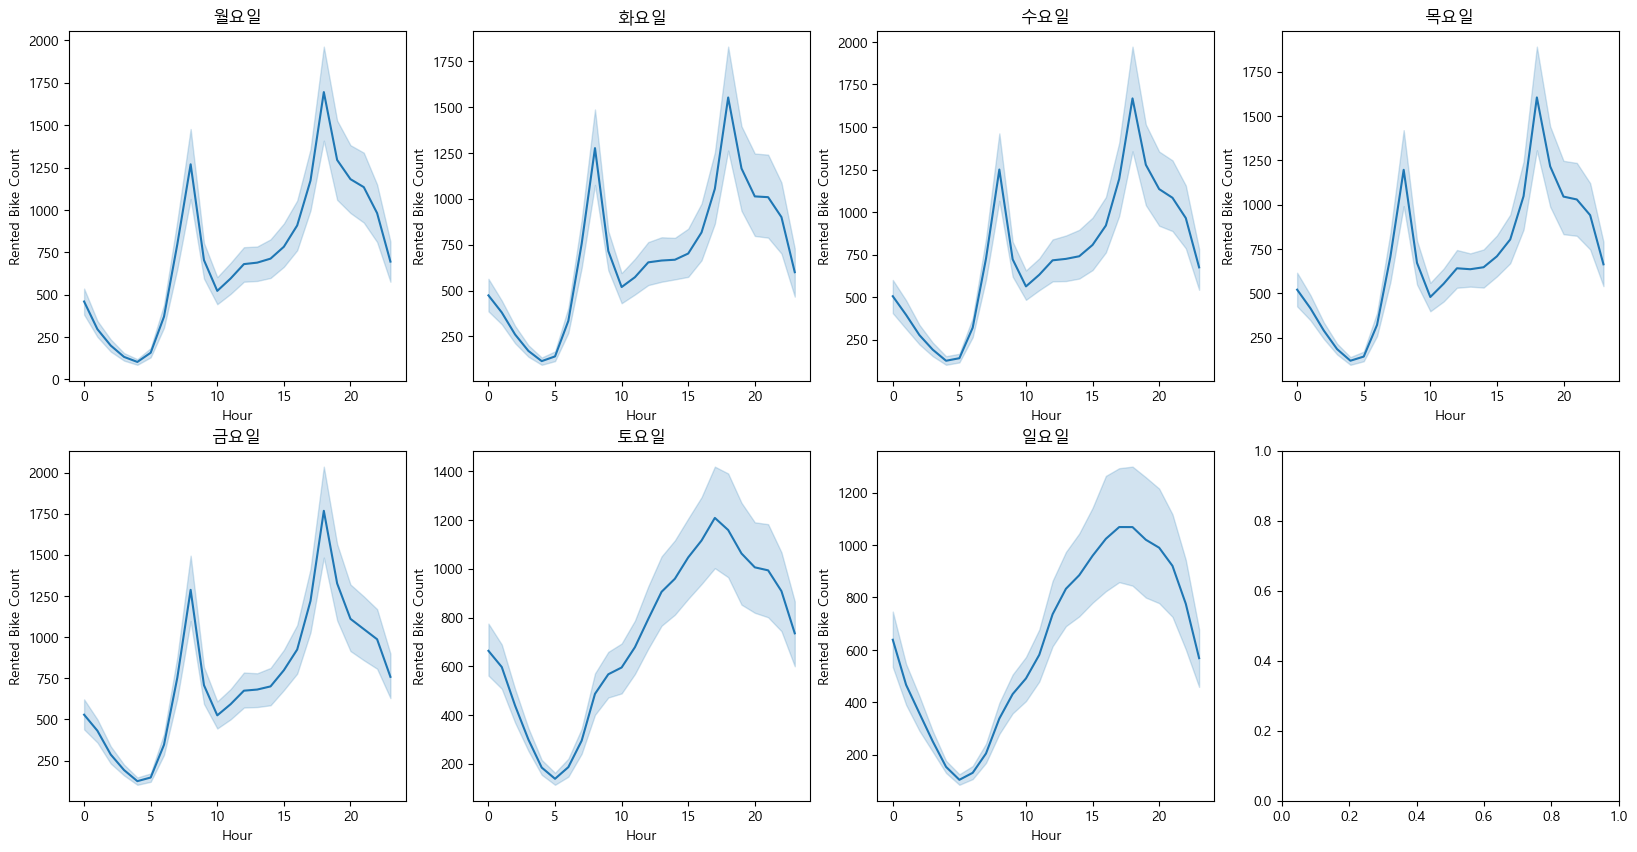

In [90]:
_, ax = plt.subplots(2,4, figsize = (20, 10)) # 원래 fig, ax지만 8개의 그래프가 있으므로 _로 처리.

week_list = ["월요일", "화요일","수요일","목요일","금요일","토요일","일요일"]

for i in range(7):
    sns.lineplot(x="Hour", y="Rented Bike Count", data=bike.loc[bike["Weekday2"]==week_list[i]], ax=ax[i//4, i%4]) 
    ax[i//4, i%4].set_title(week_list[i]) # 타이틀 달아주기
    #sns.lineplot(x="Hour", y="Rented Bike Count", data=bike.loc[bike["Weekday2"]=="화요일"], ax=ax[0, 1])
    #sns.lineplot(x="Hour", y="Rented Bike Count", data=bike.loc[bike["Weekday2"]=="수요일"], ax=ax[0, 2])
    # ax = ax[0, 0]로 표시
    # i // 4 = 0~3까지는 0, 4~7까지는 1. 8~11까지는 2, ...  // 몫만 가져온다.(정수형만)
    # i % 4  = 나머지만 0, 1, 2, 3으로 가져온다.
    


### (6) 가장 많이 대여된 계절은?

In [80]:
bike_seasons=bike.groupby('Seasons')['Rented Bike Count'].mean()
bike_seasons

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

### (7) 온도와 대여횟수는 관계가 있는가?(시각화로 확인)
 - 고민할 필요 없어 산포도 사용

<AxesSubplot:xlabel='Temperature(C)', ylabel='Rented Bike Count'>

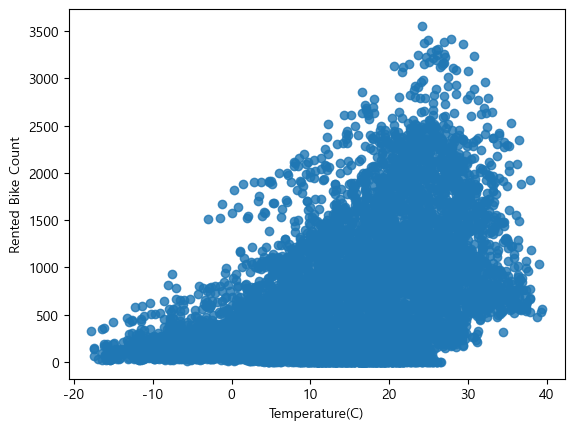

In [82]:
sns.regplot(x="Temperature(C)", y="Rented Bike Count", data = bike, fit_reg=False)

<AxesSubplot:xlabel='Temperature(C)', ylabel='Rented Bike Count'>

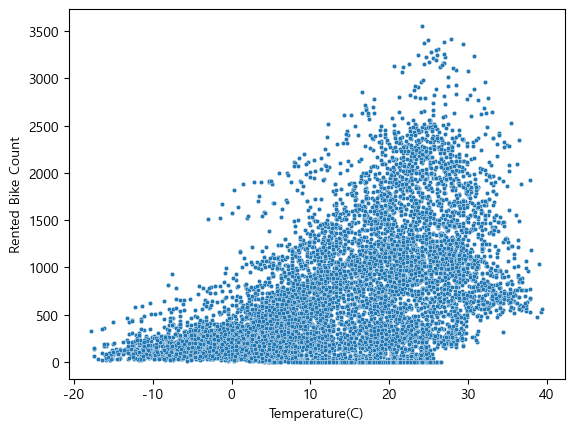

In [84]:
sns.scatterplot(x="Temperature(C)", y="Rented Bike Count", data = bike, s=10)